In [62]:
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import re

from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import defaultdict
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download(['stopwords', 'punkt', 'names', 'vader_lexicon'] )
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reque\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reque\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\reque\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\reque\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Setup

## Setup API

In [2]:
API_KEY = 'LoiVW76XekU31dGeTzRF3jaRn'
API_KEY_SECRET = 'zMI3E52t5DHPvlBEcq033ZcvzSXwudxOZbgWflDXaNiM29gHXG'
ACCESS_TOKEN = 'AAAAAAAAAAAAAAAAAAAAALiigwEAAAAAQL5JJp3%2BeOebr2JSQERPsx0D6b0%3Di0YCX9UIE8WQRbnyohpKwy9V4k7XCRrXXT3bfqymxQbxPMv7Tb'

In [3]:
auth = tw.OAuthHandler(API_KEY, API_KEY_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)

## Get Tweets

In [4]:
search_query = "#AppleEvent -filter:retweets"

In [6]:
# get tweets from the API
tweets = tw.Cursor(api.search_tweets,
              q=search_query,
              lang="en",
              since="2022-09-07").items(500)
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


Total Tweets fetched: 500


## DataFrame

In [7]:
import pandas as pd

# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
tweets_df.head()

C:\Users\reque\AppData\Local\Temp\ipykernel_9972\186974113.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name,


,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,Mohit Kalra,"Adelaide, Australia",Certified Wireless Network #Trainer | #CWNA |#...,False,2022-09-12 23:26:09+00:00,Welcome #iOS16 #AppleEvent 🤩 https://t.co/a0U8...,"[iOS16, AppleEvent]",Twitter for iPhone
1,Abhishek Dhadi,"Ghazipur, India",Here for Tech Craze and Puns,False,2022-09-12 23:25:39+00:00,iOS 16 Lockscreen is just on another level\n\n...,"[diljit, apple, ios, ios16, LockScreen, AppleE...",Twitter for iPhone
2,Mohit Kalra,"Adelaide, Australia",Certified Wireless Network #Trainer | #CWNA |#...,False,2022-09-12 23:25:28+00:00,Welcome #iOS16 #AppleEvent 🤩 https://t.co/0aqp...,"[iOS16, AppleEvent]",Twitter for iPhone
3,Mohit Kalra,"Adelaide, Australia",Certified Wireless Network #Trainer | #CWNA |#...,False,2022-09-12 23:24:45+00:00,Welcome #iOS16 #AppleEvent 🤩 https://t.co/tfF6...,"[iOS16, AppleEvent]",Twitter for iPhone
4,jess,"Anywhere, USA",just riding the wave called life. ♌️ 🐆,False,2022-09-12 23:22:55+00:00,Just updated to iOS 16 Love it #apple #Ap...,"[apple, AppleEvent, Thirteen]",Twitter for iPhone


In [9]:
tweets_df.shape

(500, 8)

# Analisis Exploratorio (pre-limpieza)

### Cantidad de caracteres en el tweet

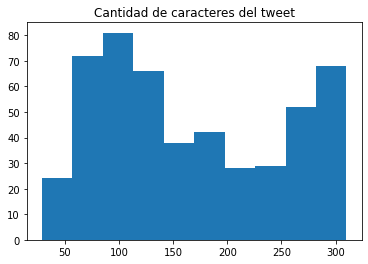

In [25]:
tweet_length = tweets_df['text'].str.len()
plt.hist(tweet_length)
plt.title('Cantidad de caracteres del tweet')
plt.show()

### Cantidad de palabras en el tweet

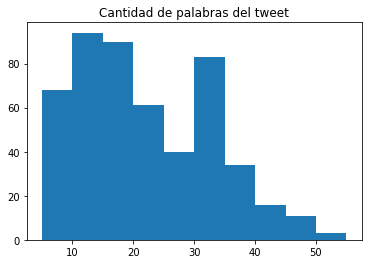

In [26]:
tweet_length = tweets_df['text'].str.split().map(lambda x: len(x))
plt.hist(tweet_length)
plt.title('Cantidad de palabras del tweet')
plt.show()

### Promedio de longitud de las palabras

C:\Users\reque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

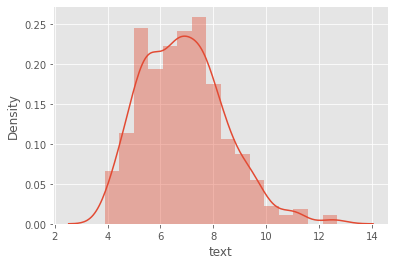

In [30]:
word=tweets_df['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)))

In [33]:
def create_corpus(target):
    corpus=[]
    
    for x in tweets_df['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

### Stopwords

In [36]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

<BarContainer object of 10 artists>

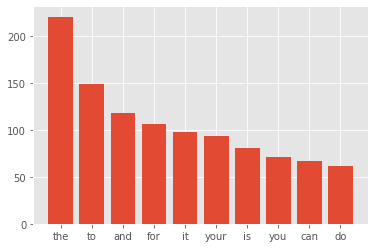

In [37]:
x,y=zip(*top)
plt.bar(x,y)

### Puntuacion

In [38]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

<Figure size 720x360 with 0 Axes>

<BarContainer object of 12 artists>

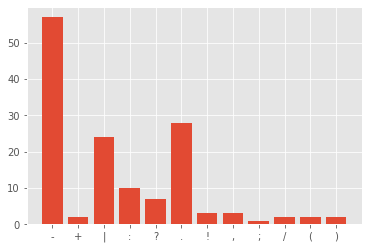

In [39]:
x,y=zip(*dic.items())
plt.bar(x,y)

### Palabras comunes

<AxesSubplot:>

C:\Users\reque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128138 (\N{PILL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


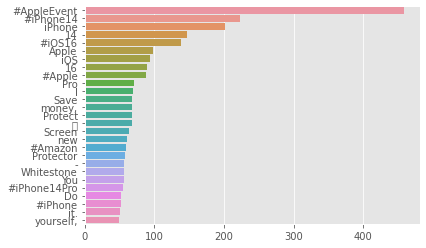

In [42]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

### Analisis ngramas

#### Bigrama

In [43]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

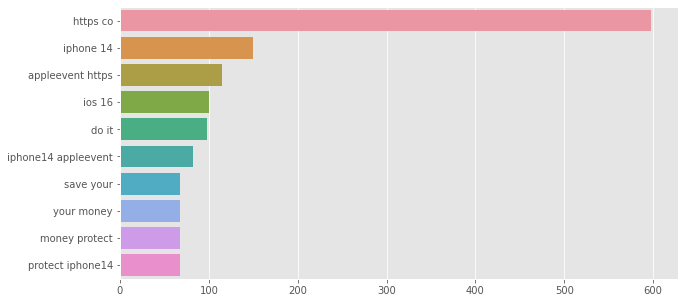

In [46]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(tweets_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

### Trigrama

In [47]:
def get_top_tweet_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

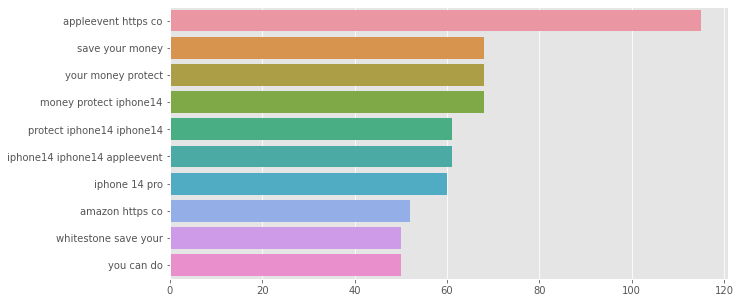

In [49]:
plt.figure(figsize=(10,5))
top_tweet_trigrams=get_top_tweet_trigrams(tweets_df['text'])[:10]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)

# Limpieza de los datos

### Quitar URLs

In [60]:
def remove_URL(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)

In [63]:
tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_URL(x))

### Quitar tags HTML

In [64]:
def remove_HTML(text):
  html = re.compile(r'<.*?>')
  return html.sub(r'', text)

In [65]:
tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_HTML(x))

### Quitar emojis

In [66]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [67]:
tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_emoji(x))

### Quitar puntuacion

In [68]:
def remove_point(text):
  table = str.maketrans('', '', string.punctuation)
  return text.translate(table)

In [70]:
tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_point(x))

# Analisis post limpieza

### Caracteres

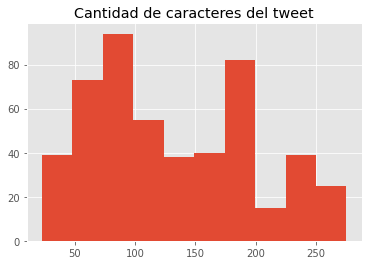

In [71]:
tweet_length = tweets_df['text'].str.len()
plt.hist(tweet_length)
plt.title('Cantidad de caracteres del tweet')
plt.show()

### Palabras

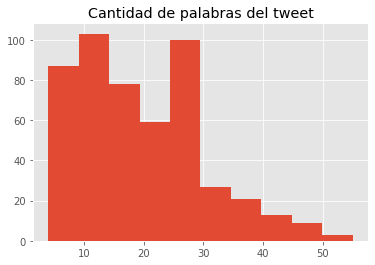

In [72]:
tweet_length = tweets_df['text'].str.split().map(lambda x: len(x))
plt.hist(tweet_length)
plt.title('Cantidad de palabras del tweet')
plt.show()

### Promedio longitud

C:\Users\reque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

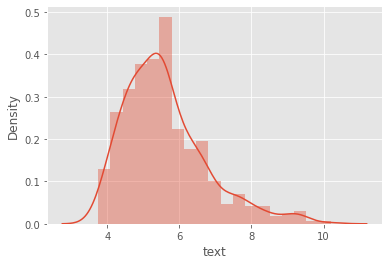

In [73]:
word=tweets_df['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)))

### Palabras comunes

<AxesSubplot:>

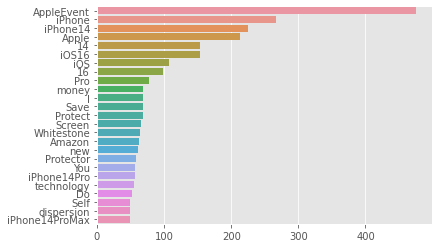

In [76]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

### Analisis ngramas

#### Bigrama

In [77]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

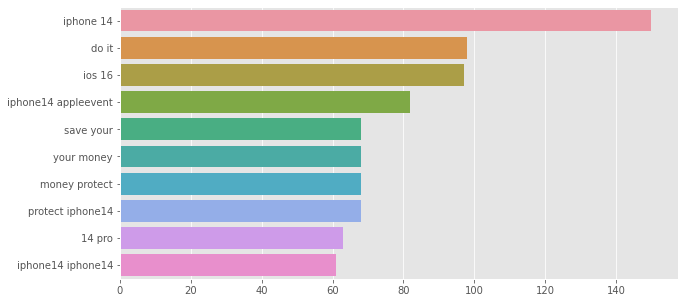

In [78]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(tweets_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

#### Trigrama

In [79]:
def get_top_tweet_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

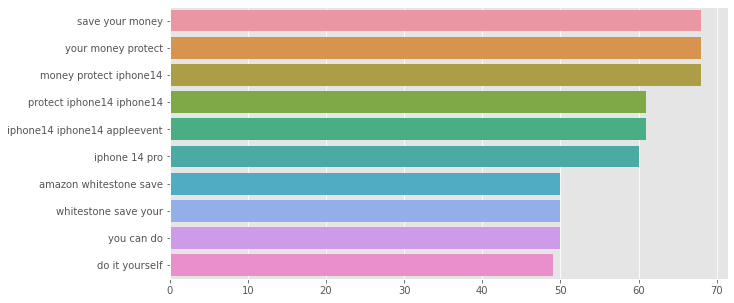

In [80]:
plt.figure(figsize=(10,5))
top_tweet_trigrams=get_top_tweet_trigrams(tweets_df['text'])[:10]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)

## Analisis sentimientos

In [53]:
sia = SentimentIntensityAnalyzer()

### Determinacion de valores de positividad, neutralidad, y negatividad

In [54]:
def getScoreText(text):
    scoreObject = sia.polarity_scores(text)
    score = scoreObject['compound']
    return score

In [55]:
tweets_df['score'] = tweets_df['text'].apply(lambda x : getScoreText(x))

### Determinacion de polaridad de acuerdo a los valores

In [56]:
#rangos de score
def setPolarity(score):
    if score < -0.33:
        return 'negative'
    elif score > 0.33:
        return 'positive'
    else:
        return 'neutral'

In [57]:
tweets_df['polarity'] = tweets_df['score'].apply(lambda x : setPolarity(x))

### Tweets mas positivos y negativos

#### 10 mas negativos

In [58]:
tweets_df.sort_values(by=['score']).head(10)

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,score,polarity
50,GODIAN KEez0,,Just good 😑😑😑😑😑,False,2022-09-12 20:36:52+00:00,"There‘s no bad product, just bad execution“.\n...","[loft, AppleEvent, iPhone14Pro]",Twitter for iPhone,-0.8481,negative
240,Rudhra Nandu,"Bhagyanagar, India","Freelance Writer, Contributor and Tech Enthusi...",False,2022-09-12 14:40:06+00:00,"According to @mingchikuo, the pre-orders of iP...",None,Twitter Web App,-0.7574,negative
180,Blunt Bear,,"We teach stock analysis, research-based\nForme...",False,2022-09-12 17:03:34+00:00,"1/ $AAPL bullying $GOOGL?\n\nYup, you got that...",[AppleEvent],Twitter for iPhone,-0.6641,negative
166,Chels 💕,,• 26 • Bailey & Charlie 🐶 •,False,2022-09-12 17:10:43+00:00,"It’s time, bitches! ❤️ #AppleEvent #iOS16 http...","[AppleEvent, iOS16]",Twitter for iPhone,-0.6360,negative
490,Neil Sargeant,🇬🇧,Tech Enthusiast 📱- Android & iOS - Photographe...,False,2022-09-11 19:46:44+00:00,Dear god why!!! I can see why apple did it to ...,None,Twitter for iPhone,-0.5894,negative
116,ShivTheDestroyerOfEvil,"Austin, TX","Believes in Meritocracy, Cannot stand Hypocrites",False,2022-09-12 18:35:22+00:00,Seriously... I thought these kind of silly thi...,None,Twitter Web App,-0.5849,negative
25,Niccolò Machiavelli,,"İnsanlar genel olarak elleriyle değil, gözleri...",False,2022-09-12 21:56:30+00:00,ios16 battery performance is very bad 40% cons...,"[iOS16, AppleEvent, apple, iPhone, iPhone14]",Twitter for iPhone,-0.5849,negative
405,Jason Q,"Eugene, OR",Just a Missouri boy living the PNW life.,False,2022-09-12 02:59:25+00:00,If the iPhone 15 doesn’t fold and isn’t named ...,"[AppleEvent, iPhone]",Twitter for iPhone,-0.5574,negative
111,Shibly Nahiduzzaman,"Dhaka, Bangladesh",Tech Enthusiast📱Foodie🍴Travel Junkie 🚀 Interes...,False,2022-09-12 18:40:22+00:00,BTW the green dot is your live location and no...,None,Twitter for iPhone,-0.5310,negative
42,Pacholiday3🌊,United States,Entrepreneur | Adventuress | Tech Savey Stylis...,False,2022-09-12 20:53:16+00:00,Any minute now I’m bout grab #iOS16 #AppleEven...,"[iOS16, AppleEvent]",Twitter for iPhone,-0.5267,negative


#### 10 mas positivos

In [59]:
tweets_df.sort_values(by=['score'], ascending=False).head(10)

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,score,polarity
247,Liz Couto,Toronto,"Product Marketing @unity. Previously @Shopify,...",False,2022-09-12 14:17:10+00:00,"I'm a bit late to the #AppleEvent party, but w...",[AppleEvent],Twitter Web App,0.9513,positive
485,SaadPlayz,Earth,17yo | Tech + Apple fanboy | Love Drawing Arts...,False,2022-09-11 20:03:29+00:00,"Damn, even tho Apple used the same design as t...",None,Twitter for iPad,0.9500,positive
416,Daniel,,•|•.creative genius •|•.roc la familia,False,2022-09-12 02:12:43+00:00,@tim_cook congrats on the #AppleEvent \nMight ...,[AppleEvent],Twitter for Android,0.9451,positive
330,Whitestone_EU,,Best Device Protectors\nDome Glass/ EZ Glass/ ...,False,2022-09-12 08:56:00+00:00,The best Apple iPhone 14 screen protectors htt...,None,Buffer,0.9222,positive
14,WhitestoneJP,,Full protection You can't see https://t.co/AMQ...,False,2022-09-12 22:30:05+00:00,The best Apple iPhone 14 screen protectors htt...,None,Buffer,0.9222,positive
367,Whitestone_EU,,Best Device Protectors\nDome Glass/ EZ Glass/ ...,False,2022-09-12 06:26:00+00:00,The best Apple iPhone 14 screen protectors htt...,None,Buffer,0.9222,positive
351,Whitestone_EU,,Best Device Protectors\nDome Glass/ EZ Glass/ ...,False,2022-09-12 07:26:01+00:00,The best Apple iPhone 14 screen protectors htt...,None,Buffer,0.9222,positive
339,Whitestone_EU,,Best Device Protectors\nDome Glass/ EZ Glass/ ...,False,2022-09-12 08:26:00+00:00,The best Apple iPhone 14 screen protectors htt...,None,Buffer,0.9222,positive
209,GroupCal,,GroupCal Shared Calendar: share calendars with...,False,2022-09-12 16:02:21+00:00,Welcome iOS16! We are so excited to share Grou...,None,Metricool,0.8901,positive
434,iMore,🎉💛🎉,"Follow us for breaking Apple news, rumors, and...",True,2022-09-12 00:30:00+00:00,One of the highlights of the #AppleEvent was t...,[AppleEvent],Buffer,0.8816,positive


#### Conteo de tweets en general

In [86]:
tweets_df['score'].value_counts().sort_index()

-0.8481    1
-0.7574    1
-0.6641    1
-0.6360    1
-0.5894    1
          ..
 0.8901    1
 0.9222    5
 0.9451    1
 0.9500    1
 0.9513    1
Name: score, Length: 126, dtype: int64